# Lab 4 - Time Series Decomposition

## Introduction

In this lab, we will explore time series decomposition and demonstrate how to automatically break down a time series into its key components using Python. By the end of this lab, you will know:

- The essential components of a time series.
- How to distinguish between additive and multiplicative time series models.
- How to decompose time series data and visualize the results using Python.

## Learning Outcomes

To achieve these objectives, we will:

1. Construct each time series component individually.
2. Combine the components to simulate a time series dataset.
3. Use Python to apply time series decomposition and plot the results.
4. Apply decomposition techniques to a real-world time series dataset.

## Overview of Time Series Decomposition

Time series data can be broken down into three primary components:

- **Trend**: The long-term direction of the data, indicating whether it is increasing or decreasing over time.
- **Seasonality**: Recurring short-term patterns or cycles within the data.
- **Residual**: The random fluctuations that cannot be explained by the trend or seasonality.

A time series can be modeled either additively or multiplicatively:

- **Additive Model**: The components are summed together:

  $$
  Y(t) = T(t) + S(t) + R(t)
  $$

  Where:
  - \( Y(t) \) is the observed time series at time \( t \),
  - \( T(t) \) is the trend component,
  - \( S(t) \) is the seasonality component,
  - \( R(t) \) is the residual component.

- **Multiplicative Model**: The components are multiplied together:

  $$
  Y(t) = T(t) \times S(t) \times R(t)
  $$

Decomposition helps in breaking down complex time series problems, allowing for clearer insights into individual components and aiding in forecasting tasks.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## Section 1: Constructing Trend, Seasonality, and Residual Components


In this section, we will construct individual components of a fictional time series: the **trend**, **seasonality**, and **residuals**. This example will help you understand how a basic time series dataset is built, providing a foundation for further analysis. To begin, let's define the time interval.


In [2]:
time = np.arange(1, 61)

### 1.1. Constructing the Trend Component

Let's first create a **trend** component. Imagine a sensor that measures heating costs in a region with cold winters and warm summers. The heating cost is expected to decrease over time from winter to summer. For simplicity, we'll ignore units.

We define the trend as a linear function of time:


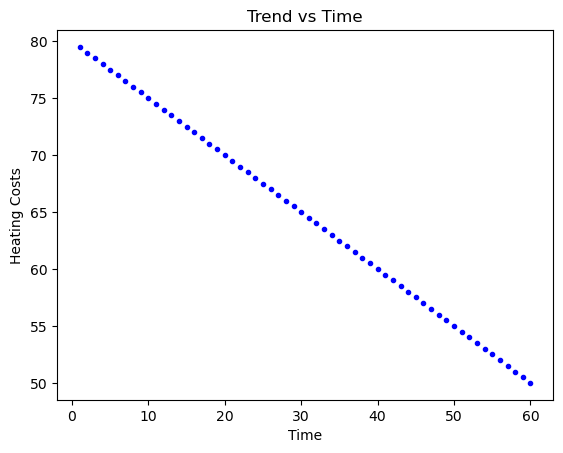

In [3]:
# Trend component: decreasing heating costs over time
trend = -0.5 * time + 80

# Plot the trend
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("Time")
plt.ylabel("Heating Costs")
plt.show()


### 1.2. Constructing the Seasonal Component

Next, let's add a **seasonal** component to simulate periodic fluctuations. We'll use a sine function to represent recurring patterns, such as monthly or yearly cycles.


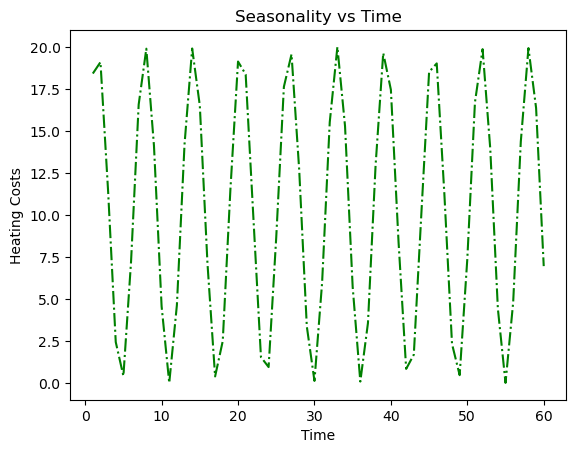

In [4]:
# Seasonal component: cyclical fluctuations
seasonal = 10 * np.sin(time) + 10

# Plot the seasonality
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("Time")
plt.ylabel("Heating Costs")
plt.show()


### 1.3. Constructing the Residual Component

Lastly, let's add some **residuals**, representing random noise or unexpected fluctuations in the data. We'll generate this using a normal distribution.


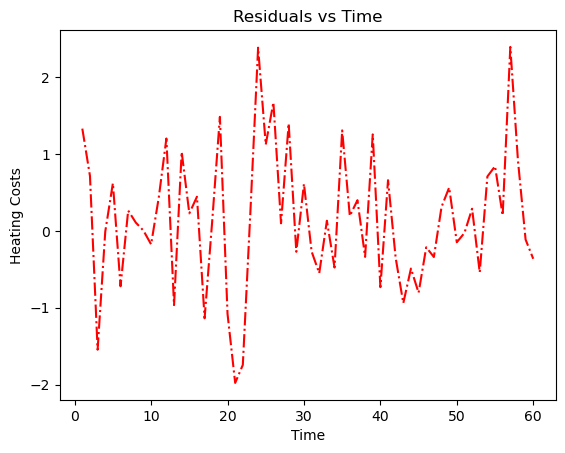

In [5]:
# Residual component: random noise
np.random.seed(10)  # Ensures reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

# Plot the residuals
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("Time")
plt.ylabel("Heating Costs")
plt.show()


### Recap and Next Step

We have successfully constructed three key components for our fictional time series dataset:

- **Trend**: A linear decrease in heating costs over time.
- **Seasonality**: Cyclical fluctuations modeled using a sine function.
- **Residuals**: Random noise following a normal distribution.

In the next section, we will combine these components to create the complete time series data. We will do this for both **additive** and **multiplicative** models.


## Section 2: Aggregate Trend, Seasonality, and Residual Components

In this section, we will combine the previously constructed components (trend, seasonality, and residuals) to create both **additive** and **multiplicative** time series models.

**_Additive Time Series_**

In an **additive model**, we assume that the components are added together. The total heating cost at each time point is the sum of the trend, seasonality, and residuals.

**_Multiplicative Time Series_**

In a **multiplicative model**, the components are multiplied together. This means that the seasonal and residual components affect the magnitude of the trend, leading to greater variation when trends are higher.

We will also explore how ignoring residuals in the multiplicative model impacts the time series.


### 2.1. Additive Time Series

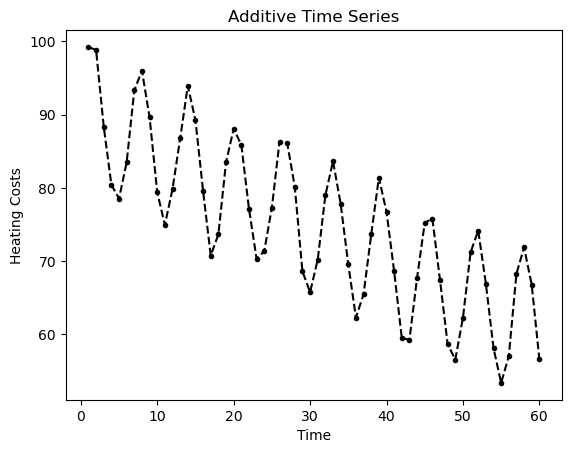

In [6]:
# Additive model: combining trend, seasonality, and residuals
additive = trend + seasonal + residual

# Plot the additive time series
plt.plot(time, additive, 'k.', linestyle='dashed')
plt.title("Additive Time Series")
plt.xlabel("Time")
plt.ylabel("Heating Costs")
plt.show()


### 2.2. Multiplicative Time Series

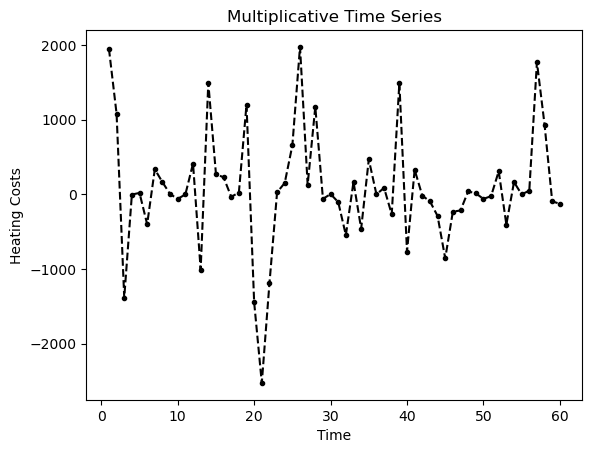

In [7]:
# Multiplicative model: combining trend, seasonality, and residuals
multiplicative = trend * seasonal * residual

# Plot the multiplicative time series
plt.plot(time, multiplicative, 'k.', linestyle='dashed')
plt.title("Multiplicative Time Series")
plt.xlabel("Time")
plt.ylabel("Heating Costs")
plt.show()


**Observation** - 
We observe that in the **multiplicative model**, the shape of the time series closely follows the patterns of the residuals. Since the residuals are multiplied with the trend and seasonality, any large variations in the residuals will have an amplified effect on the overall shape of the time series. This results in greater variability when compared to the additive model.


### 2.3. Ignoring Residuals in the Multiplicative Model

To observe the influence of residuals, we can ignore them by replacing the residual component with ones (i.e., no random variation). This will help us see how the trend and seasonality interact when residuals are not present.

When the residuals are ignored, the seasonality's magnitude depends on the trend. In other words, as the trend increases or decreases, the impact of seasonality becomes more pronounced.


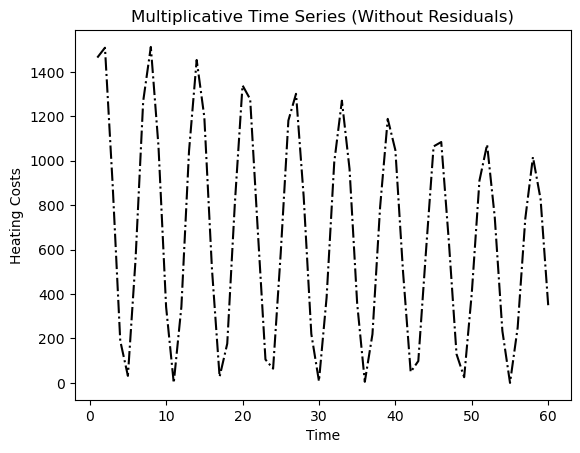

In [8]:
# Ignoring residuals in the multiplicative model
ignored_residual = np.ones_like(residual)
multiplicative_no_residual = trend * seasonal * ignored_residual

# Plot the multiplicative time series without residuals
plt.plot(time, multiplicative_no_residual, 'k-.')
plt.title("Multiplicative Time Series (Without Residuals)")
plt.xlabel("Time")
plt.ylabel("Heating Costs")
plt.show()


## Section 3: Automatic Time Series Decomposition

In this section, we will demonstrate how to automatically decompose the time series datasets we previously constructed into their three components using Python. The `statsmodels` library provides a function called `seasonal_decompose()`, which implements the classical decomposition method. This function allows us to specify whether the model is additive or multiplicative.

### 3.1. Automatic Additive Decomposition

The idea behind additive decomposition is to break the time series into three components:

1. **Estimate the trend component**  $\hat{T}_{t}$ using a moving average.
2. **Calculate the detrended series** by subtracting the estimated trend from the original series: $y_{t} - \hat{T}_{t}$.
3. **Estimate the seasonal component**  $\hat{S}_{t}$ by averaging the detrended series for each season.
4. **Estimate the residual component**  $\hat{R}_{t}$ by removing both the trend and seasonal components: $y_{t} - \hat{T}_{t} - \hat{S}_{t}$.

We will use the `seasonal_decompose()` function to decompose the additive model.


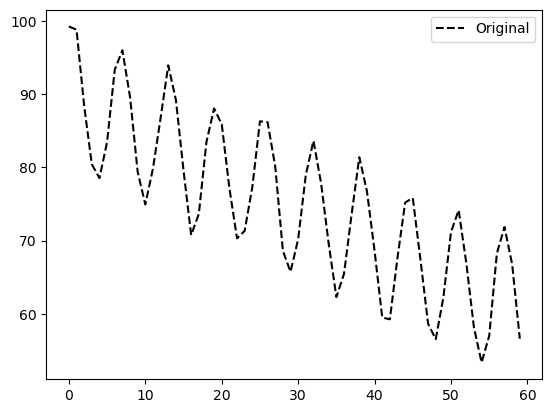

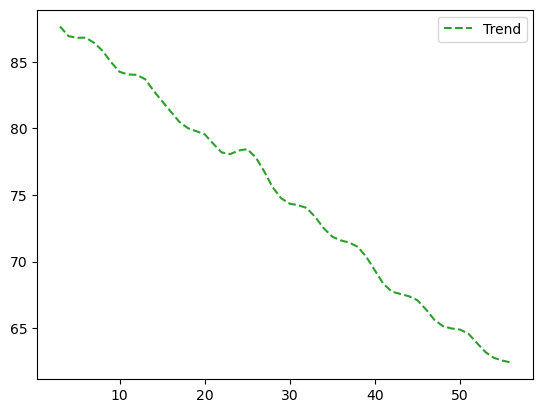

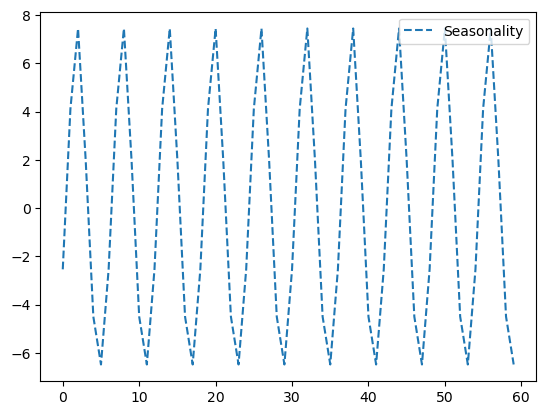

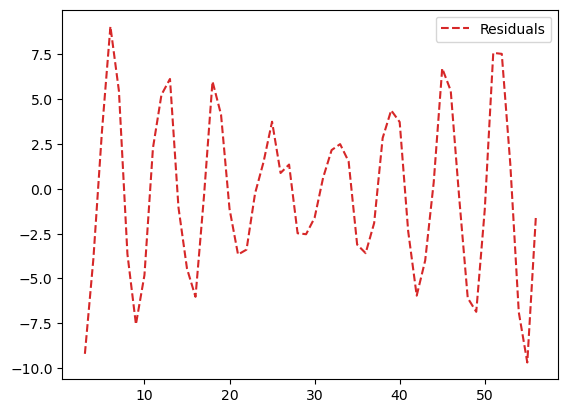

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result = seasonal_decompose(x=additive, model='additive', period=6)

# Plot the observed (original) series
plt.plot(result.observed, 'k', linestyle='dashed', label='Original')
plt.legend(loc='upper right')
plt.show()

# Plot the trend component
plt.plot(result.trend, color='tab:green', linestyle='dashed', label='Trend')
plt.legend(loc='upper right')
plt.show()

# Plot the seasonal component
plt.plot(result.seasonal, color='tab:blue', linestyle='dashed', label='Seasonality')
plt.legend(loc='upper right')
plt.show()

# Plot the residual component
plt.plot(result.resid, color='tab:red', linestyle='dashed', label='Residuals')
plt.legend(loc='upper right')
plt.show()


### 3.2. Automatic Multiplicative Decomposition

In a **multiplicative decomposition**, the components are multiplicative rather than additive. The idea follows similar steps, but the operations differ:

1. **Estimate the trend component**  $\hat{T}_{t}$ using a moving average.
2. **Calculate the detrended series** by dividing the original series by the estimated trend: $\frac{y_{t}}{\hat{T}_{t}}$.
3. **Estimate the seasonal component**  $\hat{S}_{t}$ by averaging the detrended series for each season.
4. **Estimate the residual component**  $\hat{R}_{t}$ by dividing the original series by the product of the trend and seasonal components: $\frac{y_{t}}{\hat{T}_{t} \times \hat{S}_{t}}$.

We'll use the same `seasonal_decompose()` function but specify the model as **multiplicative**.


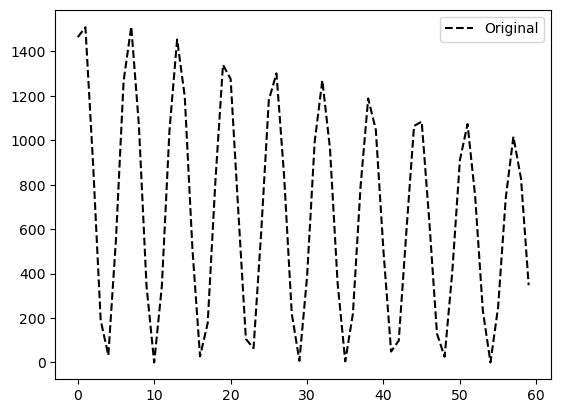

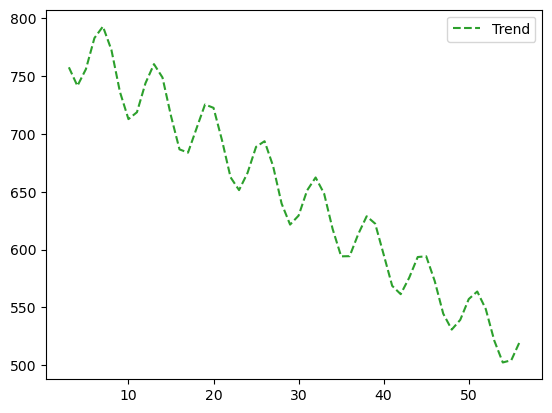

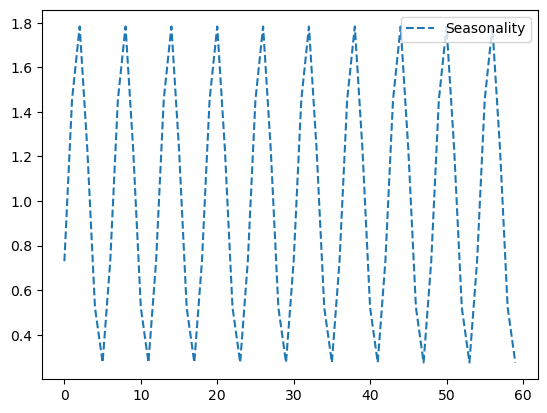

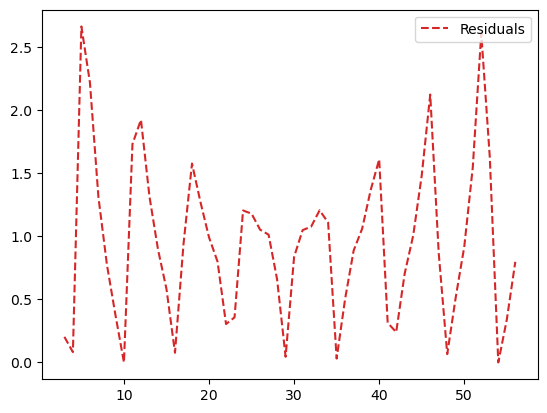

In [10]:
# Perform multiplicative decomposition
result1 = seasonal_decompose(x=multiplicative_no_residual, model='multiplicative', period=6)

# Plot the observed (original) series
plt.plot(result1.observed, 'k', linestyle='dashed', label='Original')
plt.legend(loc='upper right')
plt.show()

# Plot the trend component
plt.plot(result1.trend, color='tab:green', linestyle='dashed', label='Trend')
plt.legend(loc='upper right')
plt.show()

# Plot the seasonal component
plt.plot(result1.seasonal, color='tab:blue', linestyle='dashed', label='Seasonality')
plt.legend(loc='upper right')
plt.show()

# Plot the residual component
plt.plot(result1.resid, color='tab:red', linestyle='dashed', label='Residuals')
plt.legend(loc='upper right')
plt.show()


**Observation** - 
While decomposing the **multiplicative model**, we observe that the decomposition is not perfect, particularly in estimating the trend component.

## Section 4: Exercise

In this exercise, we will analyze a real-world dataset representing the total number of airline passengers over time. The dataset contains 144 monthly observations of the number of passengers (in thousands) from 1949 to 1960.

Your task is as follows:

1. **Load the dataset** `airline-passengers.csv` using Pandas.
2. **Visualize the time series** and set appropriate titles and axis labels.
3. **Analyze the time series** using descriptive statistics to gain insights into its behavior.
4. **Propose a model** to decompose the time series (additive or multiplicative), justify your choice, and then decompose and plot the components of the time series.
